## Name: Krishnakanth N.
## Index No: 190323C

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Q1)

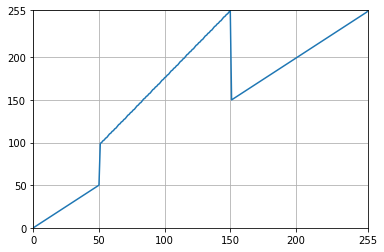

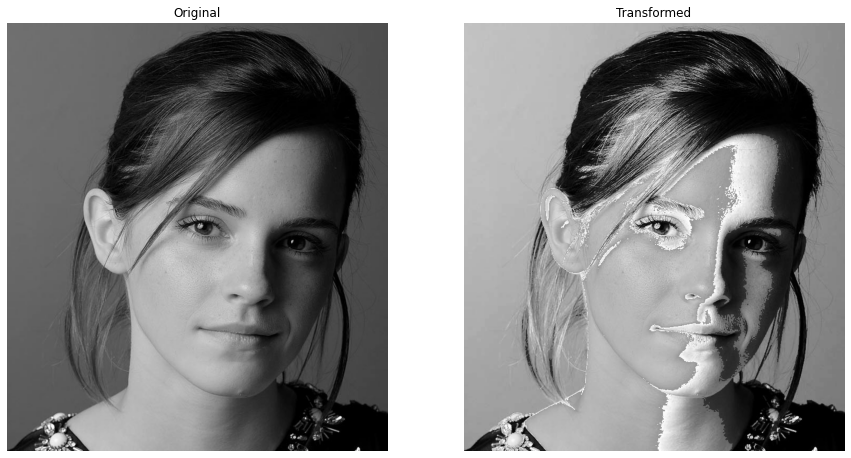

In [16]:
emma = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

t1 = np.linspace(0, 50, 51)
t2 = np.linspace(99, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

emma_intense = cv.LUT(emma, t)
emma_intense = cv.cvtColor(emma_intense, cv.COLOR_BGR2RGB)
emma = cv.cvtColor(emma, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(emma)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(emma_intense)
ax[1].set_title('Transformed')
ax[1].axis('off')

plt.show()

### Q2)
### a)

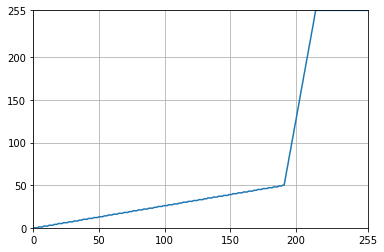

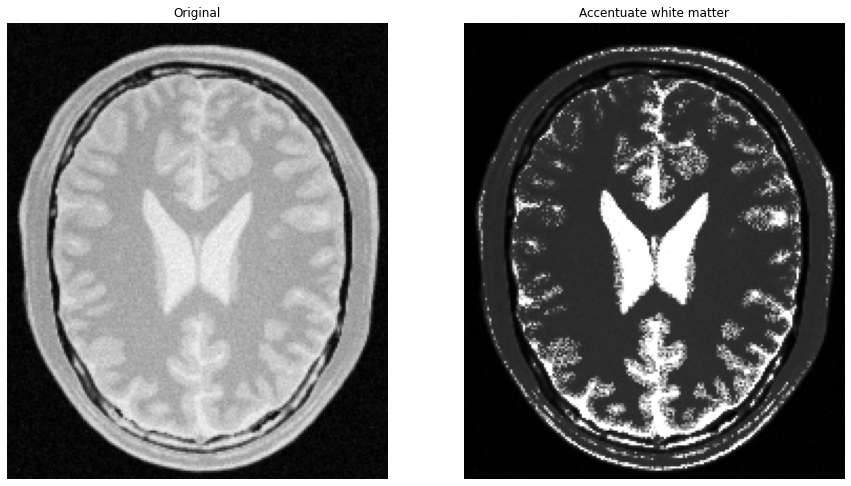

In [17]:
brain = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,50, 191)
t2 = np.linspace(50,255, 25)
t3 = np.linspace(255,255, 40)

t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate white matter')
ax[1].axis('off')

plt.show()

### b)

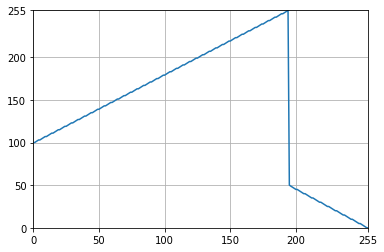

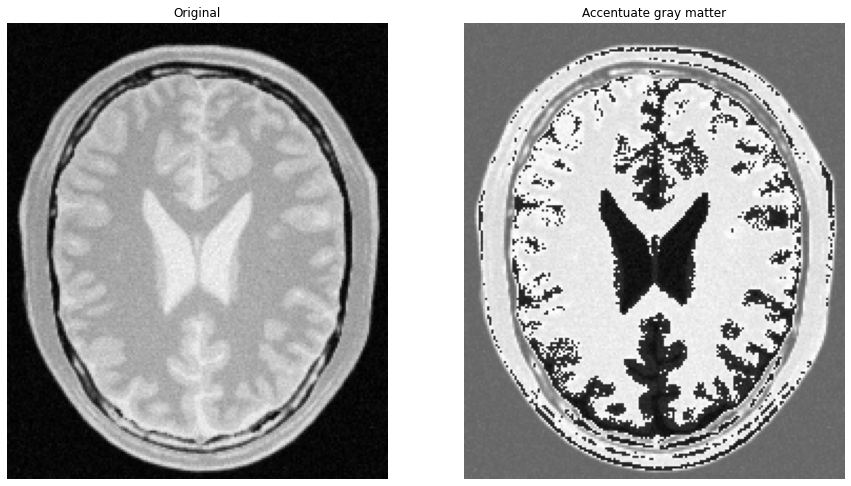

In [18]:
t1 = np.linspace(100,255, 195)
t2 = np.linspace(50,0, 61)
# t3 = np.linspace(255,255, 40)

t = np.concatenate((t1, t2), axis=0).astype(np.uint8)

fig, ax=plt.subplots()
ax.plot(t)
ax.set_xlim(0,255)
ax.set_xticks([0,50,100,150,200,255])
ax.set_ylim(0,255)
ax.set_yticks([0,50,100,150,200,255])
plt.grid()
plt.show()

assert len(t) == 256

brian_at_white = cv.LUT(brain, t)
brian_at_white = cv.cvtColor(brian_at_white, cv.COLOR_BGR2RGB)
brain = cv.cvtColor(brain, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(brain)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(brian_at_white)
ax[1].set_title('Accentuate gray matter')
ax[1].axis('off')

plt.show()

### Q3) a)

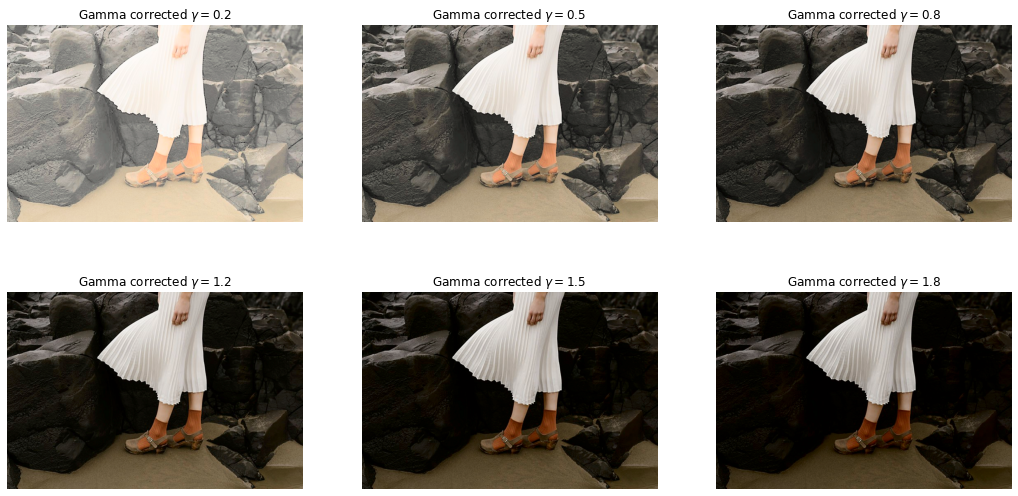

In [4]:
import copy
gamma_img = cv.imread(r'highlights_and_shadows.jpg')
gamma_img = cv.cvtColor(gamma_img, cv.COLOR_BGR2LAB)

gamma_list = [ 0.2, 0.5, 0.8, 1.2, 1.5, 1.8]
j=0
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    img_copy = cv.cvtColor(img_copy, cv.COLOR_LAB2RGB)
    
    ax[r][c].imshow(img_copy)
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))
    ax[r][c].axis('off')

    j+=1
plt.show()


### b)

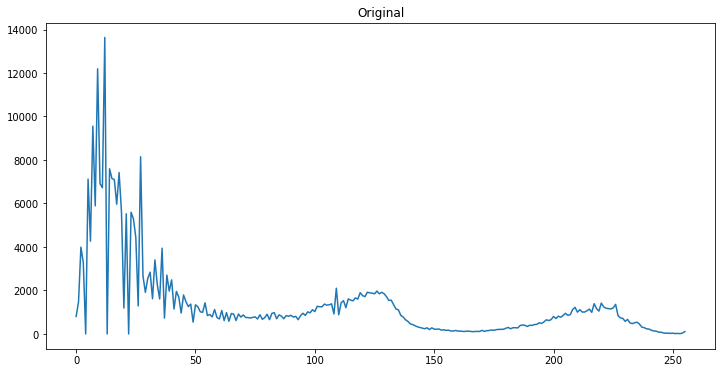

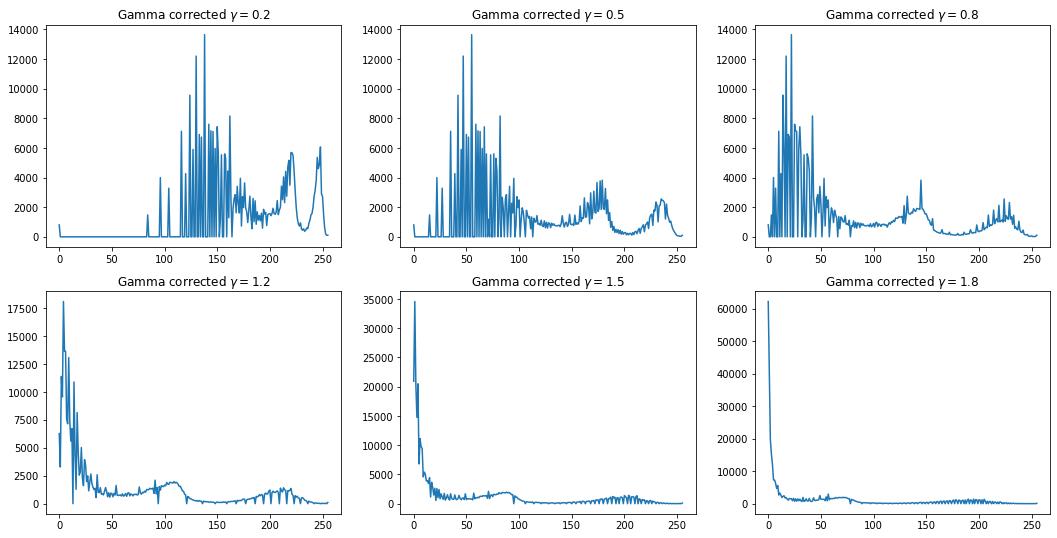

In [5]:
hist_original = cv.calcHist([gamma_img], [0], None, [256], [0,256])

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hist_original)
ax.set_title(r'Original')
plt.show()

fig, ax = plt.subplots(2, 3, figsize=(18, 9))
j=0
for gamma in gamma_list:    
    r=j//3
    c=j%3

    img_copy = copy.deepcopy(gamma_img)

    t = np.array([(p/255)**gamma*255 for p in range (0, 256)]).astype(np.uint8)
    img_copy[:,:,0] = cv.LUT(img_copy[:,:,0], t)
    hist_after = cv.calcHist([img_copy], [0], None, [256], [0,256])
    
    ax[r][c].plot(hist_after)
    ax[r][c].set_title('Gamma corrected $\gamma = {}$'.format(gamma))

    j+=1
plt.show()

### Q4)

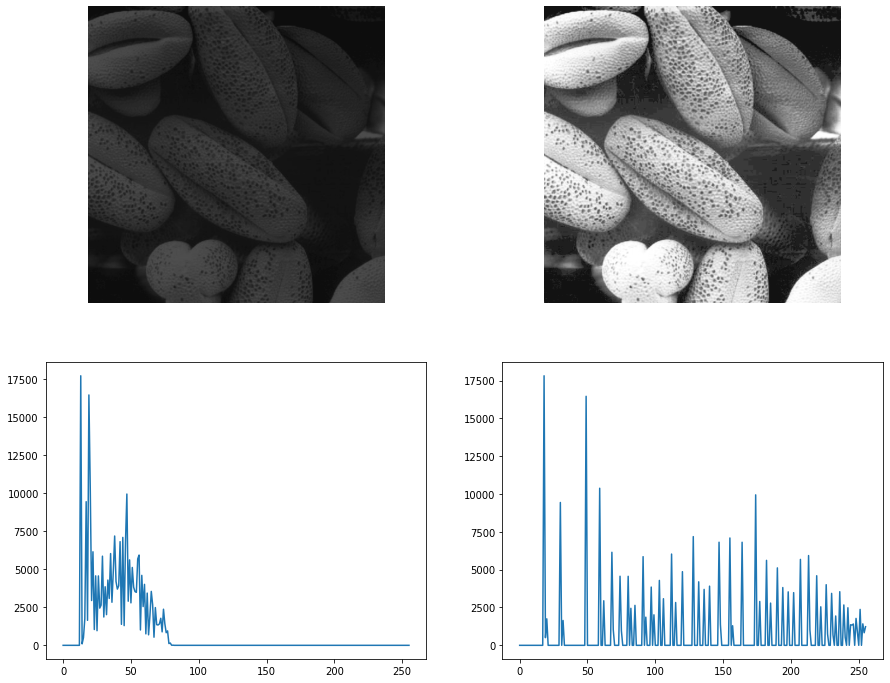

In [32]:
hist_img = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE).astype(np.uint8)
hist , bins = np.histogram(hist_img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = np.round(cdf*255/cdf.max())
enhanced = cv.LUT(hist_img, cdf_normalized)

hist_new , bins_new = np.histogram(enhanced.ravel(), 256, [0, 256])

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0,0].imshow(hist_img, cmap='gray', vmin=0, vmax=255)
ax[0,0].axis('off')
ax[0,1].imshow(enhanced, cmap='gray', vmin=0, vmax=255)
ax[0,1].axis('off')
ax[1,0].plot(hist)
ax[1,1].plot(hist_new)

plt.show()